# Learning Outcome: Plot data from different file types in a variety of plot styles (scatter plot, bar graph, line graph, etc) using matplotlib

### Import Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as l
from colour import Color

### Generate data with numpy (imported as np)
- `np.linspace`: Returns evenly spaced numbers over a specified interval (https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)

    - **Parameters:** starting value, end value, number of samples to generate

- `np.arange`: Return evenly spaced values within a given interval (https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

    - **Parameters:** starting value, end value, step / spacing between values

- `np.logspace`: Return numbers spaced evenly on a log scale (https://numpy.org/doc/stable/reference/generated/numpy.logspace.html#numpy.logspace)

    - **Parameters:** starting value, end value, number of samples to generate

In [2]:
x_data = np.linspace(0, 50, 50)

y_data = np.linspace(0, 100, 50)

### Plot 2D data using matplotlib.pyplot

- `fig = plt.figure()` generates a blank figure

- Specify the figure size with `figsize=(width, height)`

- Plot data using the the `plot(x, y)` function

    - **Note:** x and y data must be the same size

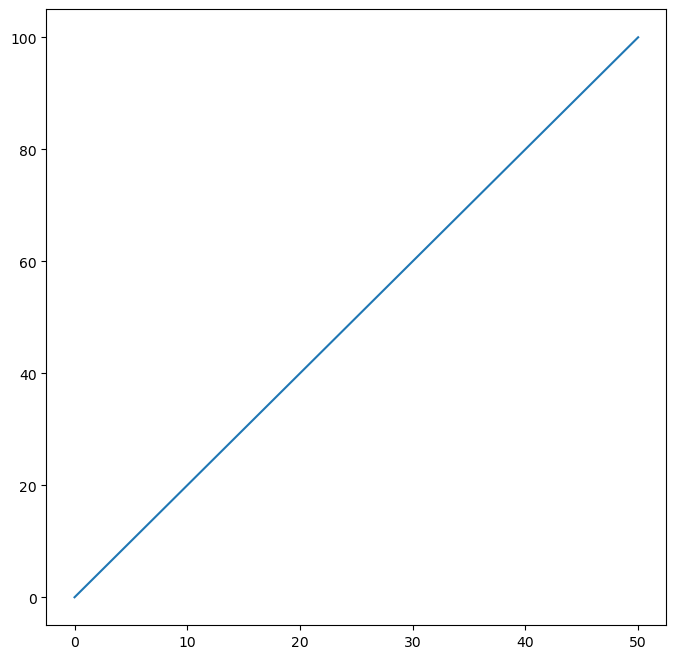

In [3]:
fig = plt.figure(figsize=(8, 8))

plt.plot(x_data, y_data)

### Plot multiple data sets on a single plot

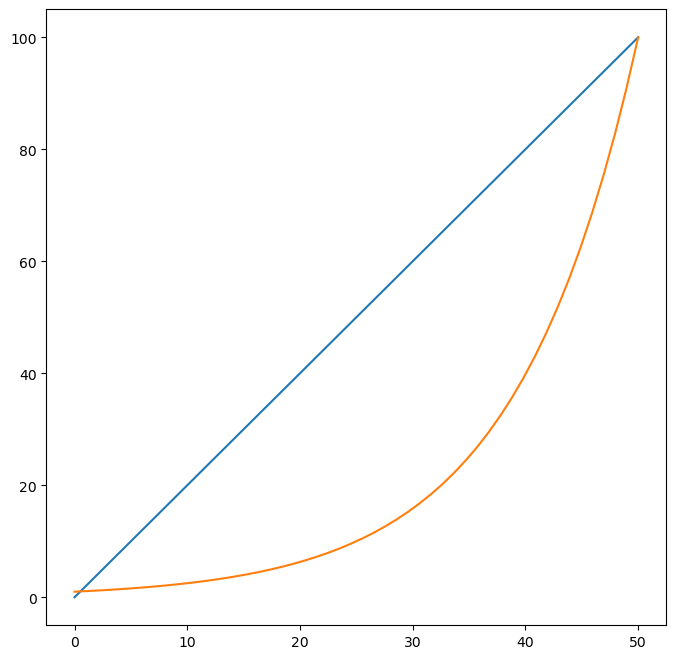

In [4]:
fig = plt.figure(figsize=(8, 8))

y2_data = np.logspace(0, 2, 50)

plt.plot(x_data, y_data)
plt.plot(x_data, y2_data)

### Formatting plot axes

- Axis limits can be specified with `xlim(min, max)` and `ylim(min, max)`
    - `numpy.max` (finds the largest value in an array) and `numpy.min` are useful for setting limits on axes
- Axis labels can be added using `xlabel('Label Text')` and `xlabel('Label Text')`
    - Add a `fontsize` parameter to specify the font size
- Tick parameters are set with `tick_params(axis='both')` (setting `axis` to x or y changes only the specified axis), here we are just changing the font size of the labels

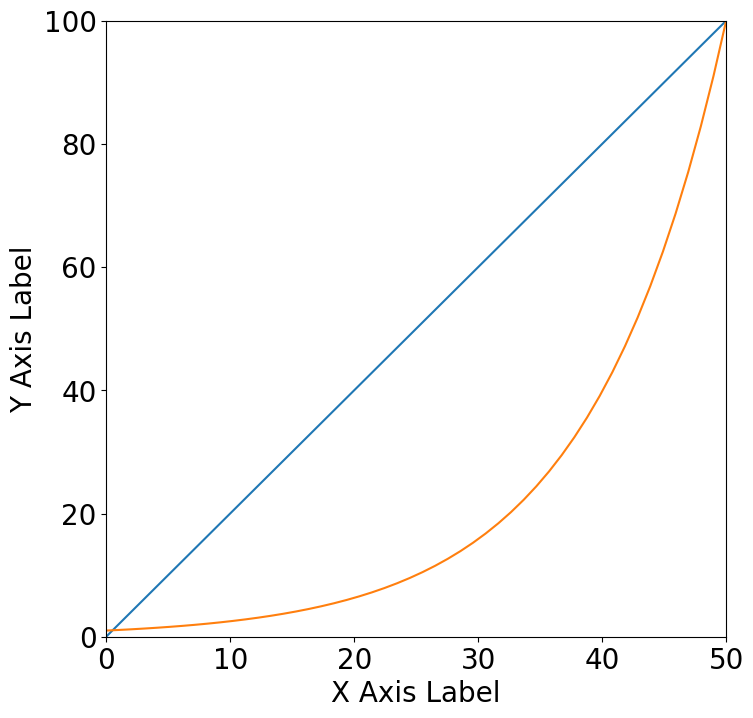

In [5]:
fig = plt.figure(figsize=(8, 8))

plt.plot(x_data, y_data)
plt.plot(x_data, y2_data)

# set axis limits
plt.xlim(0, 50)
plt.ylim(0, np.max(y2_data))

# set axis labels
plt.xlabel('X Axis Label', fontsize='20')
plt.ylabel('Y Axis Label', fontsize='20')

# set tick label size
plt.tick_params(axis='both', labelsize='20')

### Formatting other plot parameters
- The `plot` method has many different optional parameters for customizing your figure (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html), here are some more common ones:
    - `color` sets the line color, there are some built-in colors already defined, or you can specify hex/RGB/RGBA
    - `linestyle` changes the line from a solid line to the specified style
    - `linewidth` sets the line thickness

There are lots of different parameters to play around with besides these!

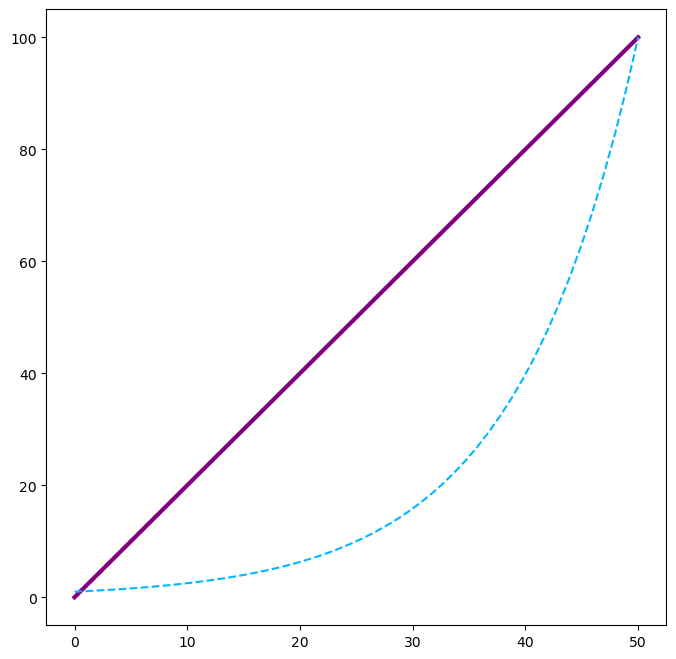

In [6]:
fig = plt.figure(figsize=(8, 8))

# set line color and width
plt.plot(x_data, y_data, color='purple', linewidth=3)

# set line style
plt.plot(x_data, y2_data, color='#00B8FF', linestyle='dashed')

### Adding a legend
- **Option 1:** add labels to plot() statements
    - `label` included as a parameter for `plot`
- **Option 2:** create handles using matplotlib.lines.Line2D and manually add them to a legend
    - We imported `matplotlib.lines` as `l` at the very beginning of the notebook, so we can call `l.Line2D`
    - `Line2D(xdata, ydata)`, here we set the x and y data to be empty arrays (`[]`) since we are not adding them on the plot, just to the legend. This method has similar customization parameters as `plot`, such as `color`, `linestyle`, etc. We will want to use `label` to include the line as a handle in the legend.

- `legend` has lots of similar optional parameters, here we set the font size (`fontsize`) and the length of the line displayed in the legend using `handlelength`. For Option 2, we need to specify the lines to use as legend handles using `handles=[]` and listing the lines we want to include.

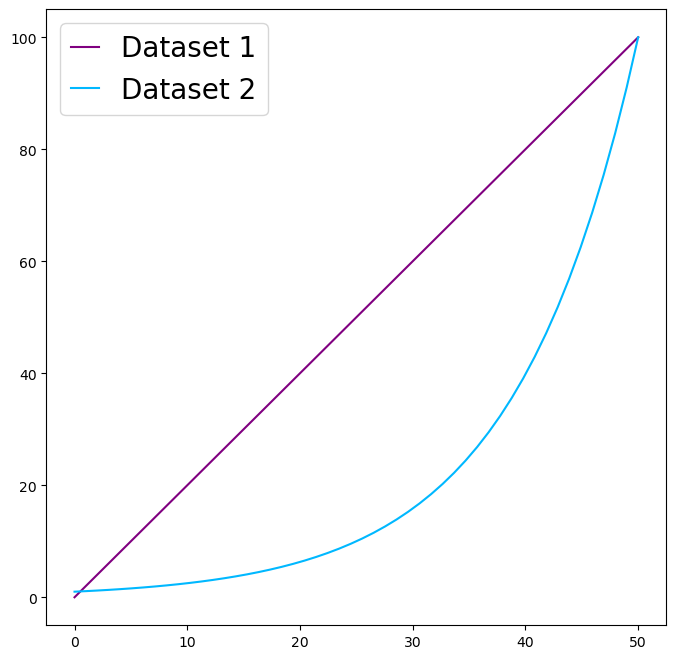

In [7]:
# Option 1
fig = plt.figure(figsize=(8, 8))

plt.plot(x_data, y_data, color='purple', label='Dataset 1')
plt.plot(x_data, y2_data, color='#00B8FF', label='Dataset 2')

# add legend (with optional parameters)
plt.legend(fontsize='20', handlelength=1)

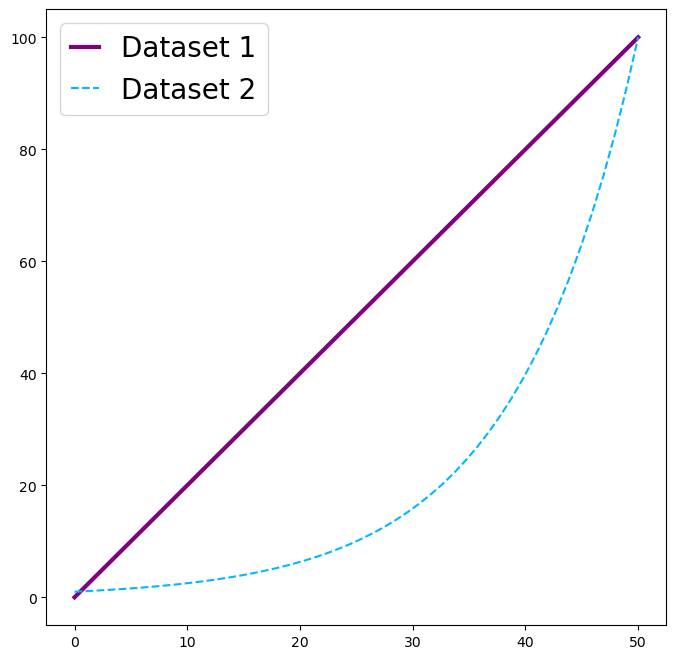

In [8]:
# option 2
fig = plt.figure(figsize=(8, 8))

plt.plot(x_data, y_data, color='purple', linewidth=3)
plt.plot(x_data, y2_data, color='#00B8FF', linestyle='dashed')

y1_handle = l.Line2D([], [], color='purple', linewidth=3, label='Dataset 1')
y2_handle = l.Line2D([], [], color='#00B8FF', linestyle='dashed', label='Dataset 2')

# add legend
plt.legend(handles=[y1_handle, y2_handle], fontsize='20', handlelength=1)

### Generate a color gradient using Color
- At the beginning of the notebook, we included `from colour import Color` to use this packages
- Using `list(color1.range_to(color2, num))` we create a list (of length 'num') of hex codes corresponding to a gradient that starts at color1 and ends at color2
- Use `Color('hexcode')` to denote the color used

In [9]:
starting_color = Color('#1F5673')
stopping_color = Color('#81F4E1')

gradient = list(starting_color.range_to(stopping_color, 5))

In [10]:
# generate some data to use with color gradient
y3_data = np.logspace(0, 2.5, 50)
y4_data = np.logspace(0, 3, 50)
y5_data = np.logspace(0, 3.5, 50)
y6_data = np.logspace(0, 4, 50)

### Using loops and lists to plot multiple data sets simultaneously
- Set the loop to iterate the same number of times as there are items in a list with `len(list)`
- Values stored in the color gradient list need to be called with `gradient[i].hex` for matplotlib to read them as the correct data type for the `color` argument

(35.0, 50.0)

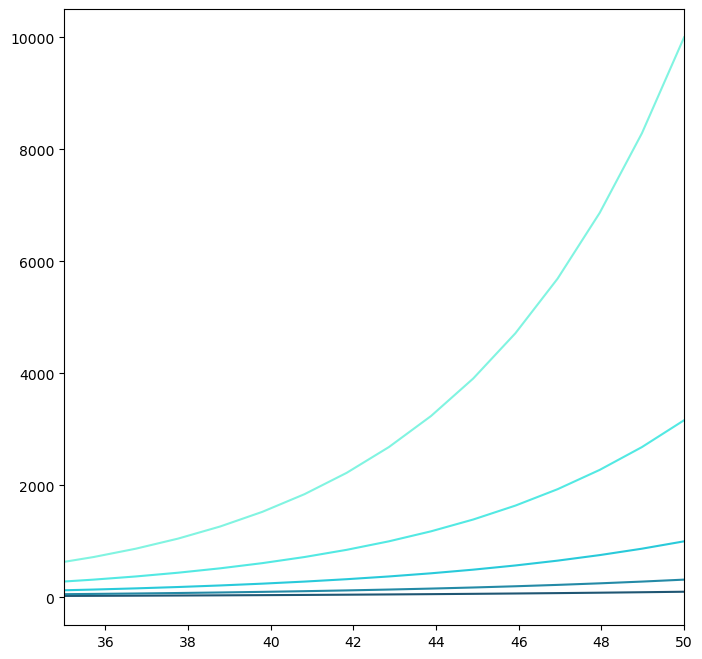

In [11]:
fig = plt.figure(figsize=(8, 8))

# create a list of data
y_data_list = [y2_data, y3_data, y4_data, y5_data, y6_data]

# use a for loop to iterate through the list of data and the color gradient list
for i in range(len(y_data_list)):
    plt.plot(x_data, y_data_list[i], color=gradient[i].hex)
    
plt.xlim(35, 50)

### Import experimental data and fit
- See the data importing tutorial for more information about how to do this

In [12]:
expt_Si_x, expt_Si_y = np.loadtxt('./data/Si_Expt.txt', unpack=True, dtype=float)
calc_Si_x, calc_Si_y = np.loadtxt('./data/Si_Calc.txt', unpack=True, dtype=float)

### Resize arrays using numpy.resize
- Remember, the x and y data must be the same size to plot in 2D

In [13]:
calc_Si_x = np.resize(calc_Si_x, expt_Si_x.shape)
calc_Si_y = np.resize(calc_Si_y, expt_Si_y.shape)

### Normalize intensity data using numpy.max
- This may or may not be necessary depending on the data you want to plot, here I'm using X-ray diffraction data from two different sources, so the intensity counts are quite different without normalizing
- Equation: normalized values = original values / maximum value from original data set

In [14]:
expt_Si_y = (expt_Si_y / np.max(expt_Si_y))
calc_Si_y = (calc_Si_y / np.max(calc_Si_y))

### Plot experimental data as a scatter plot and fit data as a line
- Use `scatter(x, y)` to generate a scatter plot
    - `marker` sets the marker shape and `s` sets the markser size
- Since we're using real data here, we want to change the axis labels to reflect what is being plotted. Special symbols can be included with unicode (other methods for scripting, including LaTeX math mode are demonstrated in another tutorial)
- Set a plot title with `title`

Text(0.5, 1.0, 'Cool and Fun Title')

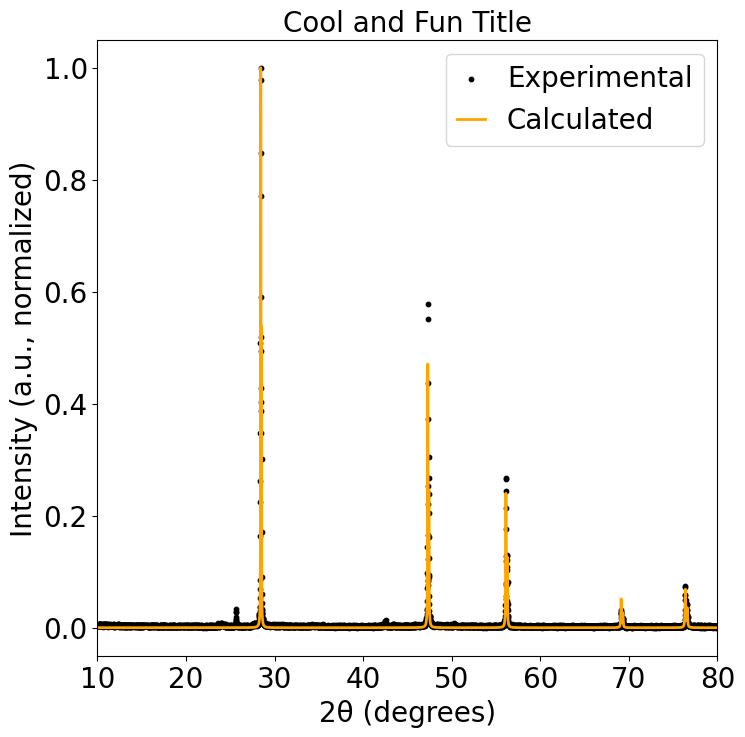

In [15]:
fig = plt.figure(figsize=(8, 8))

plt.scatter(expt_Si_x, expt_Si_y, color='black', marker='.', s=40, label='Experimental')
plt.plot(calc_Si_x, calc_Si_y, color='orange', linewidth=2, label='Calculated')

plt.xlim(10, 80)
plt.tick_params(axis='both', labelsize='20')

plt.legend(handlelength=1, fontsize=20)

# you can use unicode symbols in strings with the '\u' escape key
plt.xlabel(u'2\u03B8 (degrees)', fontsize='20')
plt.ylabel('Intensity (a.u., normalized)', fontsize='20')

# set a title
plt.title('Cool and Fun Title', fontsize='20')

### Saving a figure as an image
- `savefig('/filepath/filename.png')`
    - Other file types can be used, just specify the extension
    - Image resolution can be set with `dpi`
    - Other parameters (i.e., white space padding) found here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

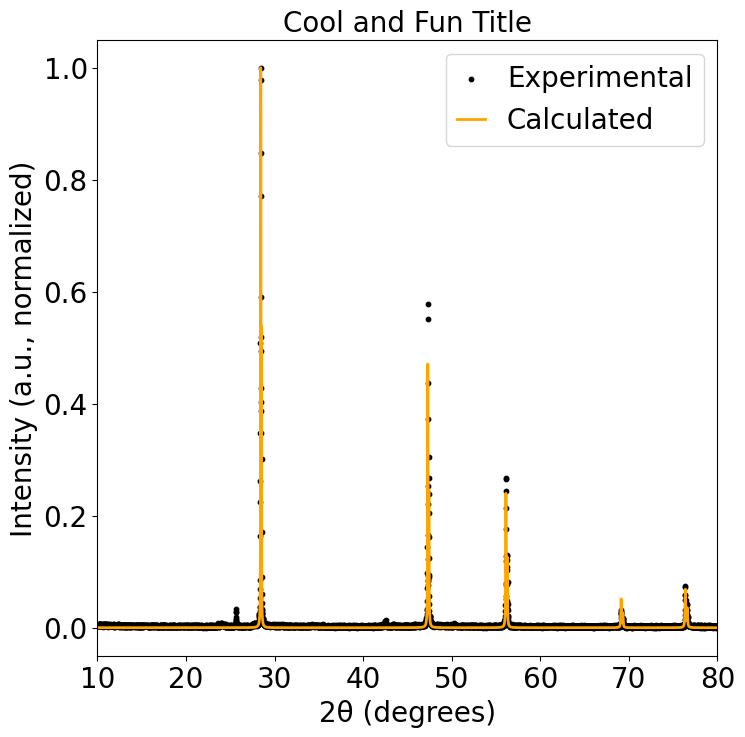

In [16]:
fig = plt.figure(figsize=(8, 8))

plt.scatter(expt_Si_x, expt_Si_y, color='black', marker='.', s=40, label='Experimental')
plt.plot(calc_Si_x, calc_Si_y, color='orange', linewidth=2, label='Calculated')

plt.xlim(10, 80)
plt.tick_params(axis='both', labelsize='20')

plt.legend(handlelength=1, fontsize=20)

plt.xlabel(u'2\u03B8 (degrees)', fontsize='20')
plt.ylabel('Intensity (a.u., normalized)', fontsize='20')

plt.title('Cool and Fun Title', fontsize='20')

# specify a file path, name, type, and image resolution
plt.savefig('./figure_name.png', dpi=1000)

### Using matplotlib.pyplot.subplots
- `fig, ax = plt.subplots(rows, cols)` where `fig` refers to the entire figure and `ax` is used to reference individual subplots, `rows` and `cols` set how many subplots are generated in the horizontal and vertical directions, respectively
    - To reference a specific subplot use, `ax[row][col]`, for example, the upper left subplot is always `ax[0][0]`. If `rows` or `cols` is set to 1, you don't need to include a bracketed value for that parameter
    - Other parameters (i.e., height and width ratios, shared axes, etc.) are found here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

In [52]:
# import a second data set
expt_Al2O3_x, expt_Al2O3_y = np.loadtxt('./data/Al2O3_Expt.txt', unpack=True, dtype=float)
calc_Al2O3_x, calc_Al2O3_y = np.loadtxt('./data/Al2O3_Calc.txt', unpack=True, dtype=float)

In [53]:
# resize
calc_Al2O3_x = np.resize(calc_Al2O3_x, expt_Al2O3_x.shape)
calc_Al2O3_y = np.resize(calc_Al2O3_y, expt_Al2O3_y.shape)

# normalize
expt_Al2O3_y = (expt_Al2O3_y / np.max(expt_Al2O3_y))
calc_Al2O3_y = (calc_Al2O3_y / np.max(calc_Al2O3_y))

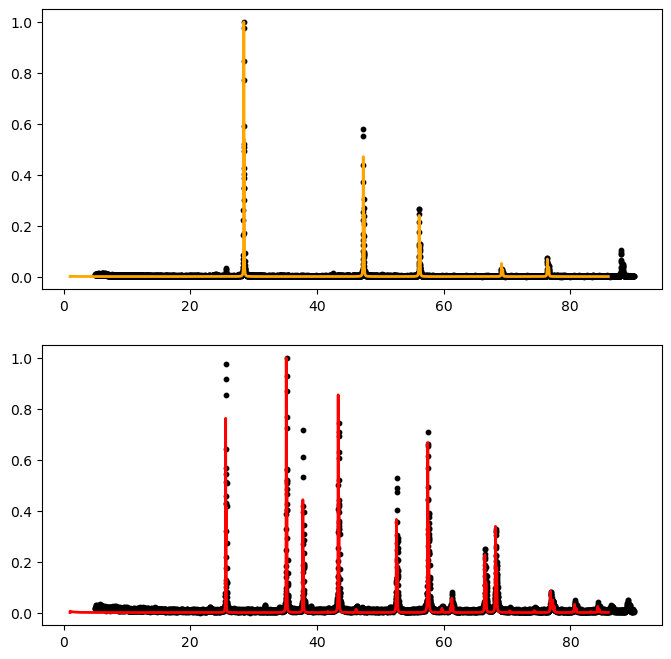

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

# add to first plot
ax[0].scatter(expt_Si_x, expt_Si_y, color='black', marker='.', s=40, label='Experimental Si')
ax[0].plot(calc_Si_x, calc_Si_y, color='orange', linewidth=2, label='Calculated Si')

# add to second plot
ax[1].scatter(expt_Al2O3_x, expt_Al2O3_y, color='black', marker='.', s=40, label='Experimental Al2O3')
ax[1].plot(calc_Al2O3_x, calc_Al2O3_y, color='red', linewidth=2, label='Calculated Al2O3')

### Use a for loop to change parameters on both subplots

**Note:** Some of the functions for changing parameters have slightly different names when using subplots (i.e., 'set_xlim' instead of 'xlim')

Text(-0.02, 0.5, 'Intensity (a.u., normalized)')

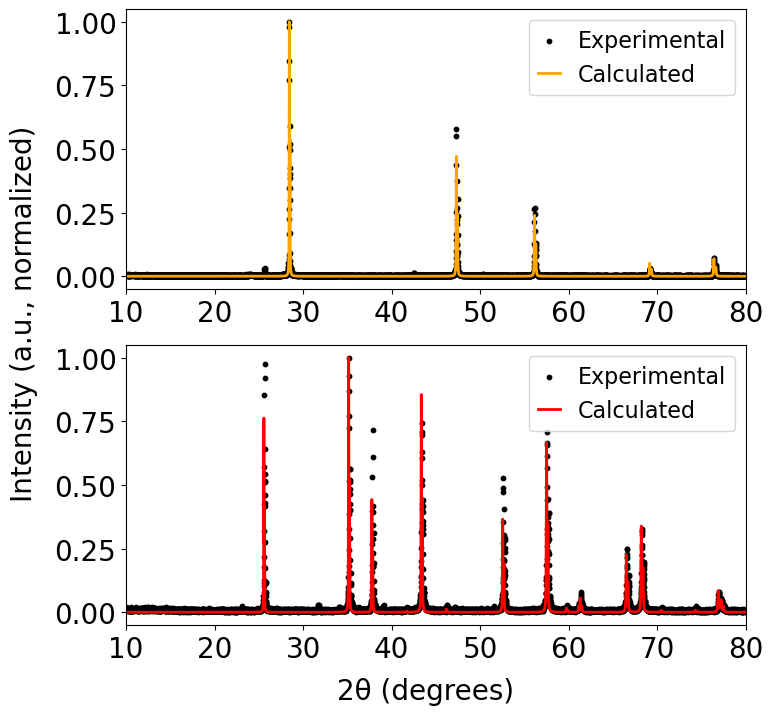

In [32]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

ax[0].scatter(expt_Si_x, expt_Si_y, color='black', marker='.', s=40, label='Experimental')
ax[0].plot(calc_Si_x, calc_Si_y, color='orange', linewidth=2, label='Calculated')

ax[1].scatter(expt_Al2O3_x, expt_Al2O3_y, color='black', marker='.', s=40, label='Experimental')
ax[1].plot(calc_Al2O3_x, calc_Al2O3_y, color='red', linewidth=2, label='Calculated')

# for loop
for i in range(2):
    ax[i].set_xlim(10, 80)
    ax[i].tick_params(axis='both', labelsize='20')
    ax[i].legend(handlelength=1, fontsize=16)

# setting axis labels for the entire figure instead of individual subplots
fig.supxlabel(u'2\u03B8 (degrees)', fontsize='20')
fig.supylabel('Intensity (a.u., normalized)', fontsize='20', x=-0.02)

### Adding text to plots
- `text(x_position, y_position, 'Text')`
    - Set horizontal and vertical alignments with `ha` and `va`

Text(11, 1.02, 'Al2O3')

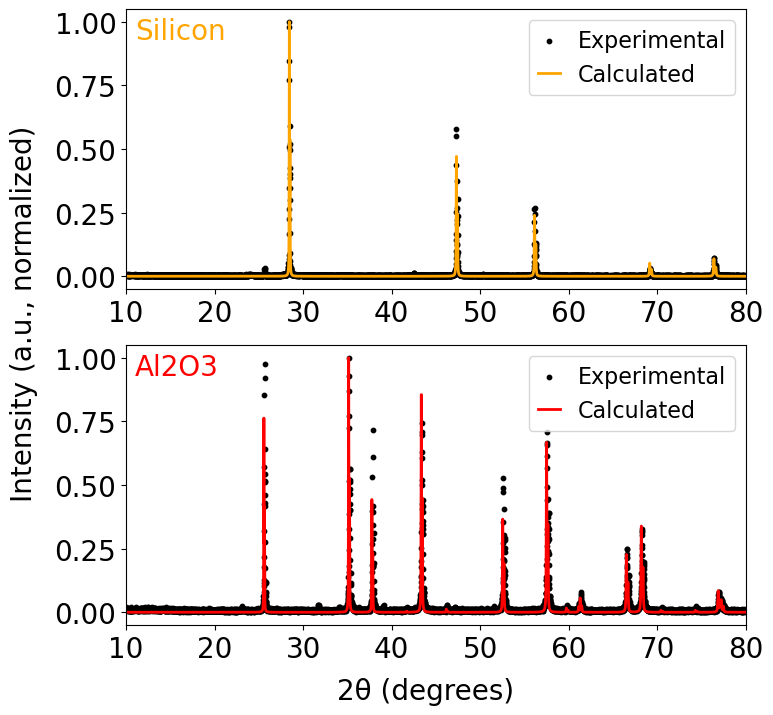

In [42]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

ax[0].scatter(expt_Si_x, expt_Si_y, color='black', marker='.', s=40, label='Experimental')
ax[0].plot(calc_Si_x, calc_Si_y, color='orange', linewidth=2, label='Calculated')

ax[1].scatter(expt_Al2O3_x, expt_Al2O3_y, color='black', marker='.', s=40, label='Experimental')
ax[1].plot(calc_Al2O3_x, calc_Al2O3_y, color='red', linewidth=2, label='Calculated')

for i in range(2):
    ax[i].set_xlim(10, 80)
    ax[i].tick_params(axis='both', labelsize='20')
    ax[i].legend(handlelength=1, fontsize=16)

fig.supxlabel(u'2\u03B8 (degrees)', fontsize='20')
fig.supylabel('Intensity (a.u., normalized)', fontsize='20', x=-0.02)

# add a text label for each subplot
ax[0].text(11, 1.02, 'Silicon', color='orange', fontsize='20', ha='left', va='top')
ax[1].text(11, 1.02, 'Al2O3', color='red', fontsize='20', ha='left', va='top')

### Hiding axes and changing subplot spacing
- We can get information about a certain subplot axis with `ax[i].get_xaxis()` (or `get_yaxis()`)
    - `ax[i].get_xaxis().set_visible(False)` will make the specified axis invisible
- Adjusting the spacing between subplots is done with `subplots_adjust()`
    - `hspace` and `wspace` are used to modify the spacing height and width, respectively

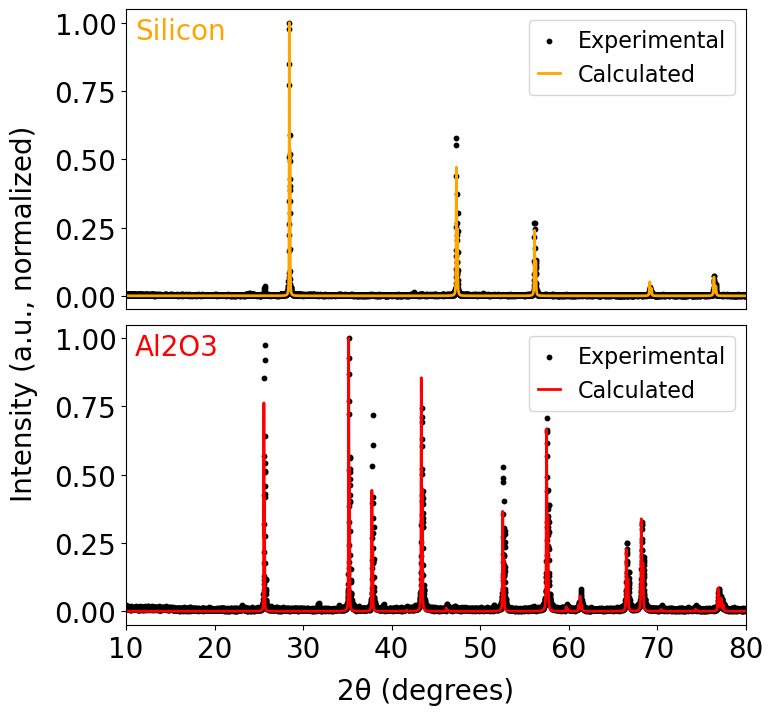

In [44]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

ax[0].scatter(expt_Si_x, expt_Si_y, color='black', marker='.', s=40, label='Experimental')
ax[0].plot(calc_Si_x, calc_Si_y, color='orange', linewidth=2, label='Calculated')

ax[1].scatter(expt_Al2O3_x, expt_Al2O3_y, color='black', marker='.', s=40, label='Experimental')
ax[1].plot(calc_Al2O3_x, calc_Al2O3_y, color='red', linewidth=2, label='Calculated')

for i in range(2):
    ax[i].set_xlim(10, 80)
    ax[i].tick_params(axis='both', labelsize='20')
    ax[i].legend(handlelength=1, fontsize=16)

fig.supxlabel(u'2\u03B8 (degrees)', fontsize='20')
fig.supylabel('Intensity (a.u., normalized)', fontsize='20', x=-0.02)

ax[0].text(11, 1.02, 'Silicon', color='orange', fontsize='20', ha='left', va='top')
ax[1].text(11, 1.02, 'Al2O3', color='red', fontsize='20', ha='left', va='top')

# set visibility of the top subplot x-axis to be false
ax[0].get_xaxis().set_visible(False)

# adjust spacing between subplots
plt.subplots_adjust(hspace=0.05)

### Adding and adjusting minor ticks
- We need to import `MultipleLocator` from the `matplotlib.ticker`
- To specify tick locations, we can use `ax[i].xaxis.set_major_locator()` for major ticks and `ax[i].xaxis.set_minor_locator()` for minor ticks. To set the spacing interval, we use `MultipleLocator(num)`, where `MultipleLocator(5)` would have a tick at multiples of 5
- We can also change the label formatting using `ax[i].xaxis.set_major_formatter()`

In [57]:
from matplotlib.ticker import MultipleLocator

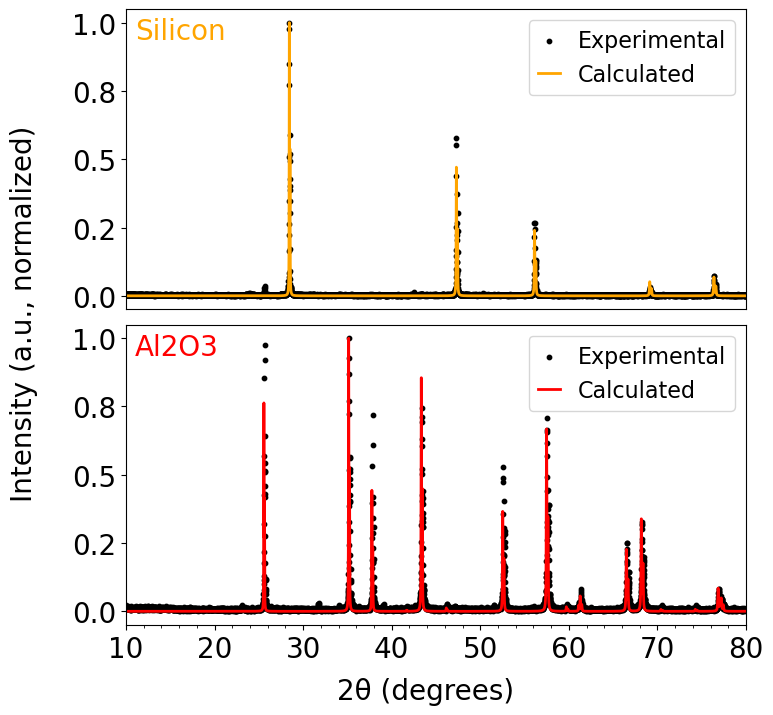

In [63]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8))

ax[0].scatter(expt_Si_x, expt_Si_y, color='black', marker='.', s=40, label='Experimental')
ax[0].plot(calc_Si_x, calc_Si_y, color='orange', linewidth=2, label='Calculated')

ax[1].scatter(expt_Al2O3_x, expt_Al2O3_y, color='black', marker='.', s=40, label='Experimental')
ax[1].plot(calc_Al2O3_x, calc_Al2O3_y, color='red', linewidth=2, label='Calculated')

for i in range(2):
    ax[i].set_xlim(10, 80)
    ax[i].tick_params(axis='both', labelsize='20')
    ax[i].legend(handlelength=1, fontsize=16)

fig.supxlabel(u'2\u03B8 (degrees)', fontsize='20')
fig.supylabel('Intensity (a.u., normalized)', fontsize='20', x=-0.02)

ax[0].text(11, 1.02, 'Silicon', color='orange', fontsize='20', ha='left', va='top')
ax[1].text(11, 1.02, 'Al2O3', color='red', fontsize='20', ha='left', va='top')

ax[0].get_xaxis().set_visible(False)

plt.subplots_adjust(hspace=0.05)

# add minor ticks to the x-axis at multiples of 2
ax[1].xaxis.set_minor_locator(MultipleLocator(2))

# change the y-axis formatting to only have one decimal place
for i in range(2):
    ax[i].yaxis.set_major_formatter('{x:.1f}')